In [83]:

from collections import Counter
import matplotlib.pyplot as plt
from matplotlib import cm
from math import log
import numpy as np
import pandas as pd 
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import normalized_mutual_info_score, adjusted_rand_score
from sklearn.manifold import MDS
from statistics import mean
import scanpy as sc

exec(compile(open(r"../nsimplices.py", encoding="utf8").read(), "nsimplices.py", 'exec'))

In [84]:
dataset_id = 'Baron'
df_gene = pd.read_csv(f"~/nSimplices/data/sce_full_{dataset_id}_scScope_log.csv", index_col=0, header=0)
df_gene = df_gene.iloc[823:]

print(df_gene.shape)
df_gene

(1063, 13357)


,X0610007P14Rik,X0610009B22Rik,X0610009E02Rik,X0610009L18Rik,X0610009O20Rik,X0610010F05Rik,X0610010K14Rik,X0610011F06Rik,X0610012G03Rik,X0610030E20Rik,...,Zw10,Zwilch,Zwint,Zxdb,Zxdc,Zyg11b,Zyx,Zzef1,Zzz3,l7Rn6
mouse2_lib1.final_cell_0002,1.622580,0.856702,0.517418,0.0,0.0,0.0,0.0,0.000000,0.000000,0.517418,...,0.517418,0.0,0.856702,0.000000,0.000000,0.000000,0.000000,0.856702,0.000000,0.000000
mouse2_lib1.final_cell_0003,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.907311,0.553210,0.000000,...,0.000000,0.0,1.375057,0.000000,0.000000,1.375057,0.000000,0.000000,0.907311,0.000000
mouse2_lib1.final_cell_0004,0.850549,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.850549,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.470711,0.000000,0.513103,0.513103
mouse2_lib1.final_cell_0005,0.000000,0.619066,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.619066,0.619066,0.619066,0.000000,0.000000,0.000000,0.000000
mouse2_lib1.final_cell_0006,0.000000,0.618157,0.000000,0.0,0.0,0.0,0.0,0.618157,0.618157,0.000000,...,0.000000,0.0,0.618157,0.000000,0.000000,0.618157,0.000000,0.618157,0.000000,0.997321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mouse2_lib3.final_cell_0391,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
mouse2_lib3.final_cell_0392,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,2.462117,0.000000,0.000000,0.000000,0.000000,0.000000,2.462117,0.000000
mouse2_lib3.final_cell_0393,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,1.923451,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
mouse2_lib3.final_cell_0394,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.036882,0.000000,0.000000,0.000000


In [85]:
# select highly variable genes 
adata = sc.AnnData(df_gene.values)
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, flavor="seurat")
top500_genes = adata.var[adata.var['highly_variable']].sort_values('dispersions_norm', ascending=False)[:500]
top500_gene_indices = top500_genes.index.tolist()
top500_gene_indices = [int(x) for x in top500_gene_indices]
gene_names = np.array(df_gene.columns)
top_genes = gene_names[top500_gene_indices]
df_gene_top500 = df_gene.loc[:, top_genes] 
df_gene.loc[:, top_genes]


,Cd74,Sparc,H2.Aa,H2.Eb1,Mgp,Igfbp5,Hspb1,Apoe,Igfbp3,Hspa1a,...,Tmem204,Il1b,Kif21b,Gadd45g,Tgm2,Il1rn,BC049715,Trim30a,Wnt4,Tfpi2
mouse2_lib1.final_cell_0002,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.082379,...,0.0,0.0,0.0,0.578440,0.000000,0.000000,0.0,0.0,0.000000,0.0
mouse2_lib1.final_cell_0003,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.555594,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0
mouse2_lib1.final_cell_0004,0.000000,0.542066,0.0,0.0,0.000000,0.000000,0.000000,0.288864,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.758587,0.719533,0.0,0.0,0.000000,0.0
mouse2_lib1.final_cell_0005,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.811321,0.000000,0.000000,0.0,0.0,0.000000,0.0
mouse2_lib1.final_cell_0006,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.588525,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mouse2_lib3.final_cell_0391,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,1.283970,0.0
mouse2_lib3.final_cell_0392,0.000000,0.000000,0.0,0.0,0.000000,0.000000,1.333846,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0
mouse2_lib3.final_cell_0393,1.337755,1.140284,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,1.140284,0.0,0.0,0.000000,0.0
mouse2_lib3.final_cell_0394,0.000000,1.846722,0.0,0.0,1.533318,2.124734,0.000000,0.000000,0.0,1.232836,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0


In [86]:
# # This would result in insufficient number of genes

# # filter out cells with more than 100 zero counts
# delete_indices = []
# for index, row in df_gene_top500.iterrows():
#     if list(row).count(0) > 300:
#         delete_indices.append(index)

# df_gene_top500 = df_gene_top500.drop(delete_indices)
# print(df_gene_top500.shape)


In [121]:

### Run nSimplices method
feature_num = df_gene_top500.shape[1]
dim_start = 3
dim_end = 3
out_dis = pdist(df_gene_top500)
out_dis_sq = squareform(out_dis)
num_point = df_gene_top500.shape[0]

outlier_indices, subspace_dim, corr_dis_sq, corr_coord = nsimplices(out_dis_sq, feature_num, dim_start, dim_end, euc_coord=np.array(df_gene_top500.copy()), std_multi=4)

idx is: 196 height is: 12.537173718003363 thres is: 10.772110445466655
idx is: 203 height is: 11.981343731957523 thres is: 10.772110445466655
idx is: 206 height is: 12.78934900337459 thres is: 10.772110445466655
idx is: 211 height is: 11.625789148285797 thres is: 10.772110445466655
idx is: 218 height is: 11.643809568469354 thres is: 10.772110445466655
idx is: 230 height is: 12.385654688161303 thres is: 10.772110445466655
idx is: 235 height is: 12.201667563373995 thres is: 10.772110445466655
idx is: 238 height is: 10.92231738669345 thres is: 10.772110445466655
idx is: 244 height is: 10.994702869743087 thres is: 10.772110445466655
idx is: 249 height is: 11.359572835336671 thres is: 10.772110445466655
idx is: 250 height is: 12.232644861482775 thres is: 10.772110445466655
idx is: 261 height is: 12.295781894821538 thres is: 10.772110445466655
idx is: 268 height is: 11.690095876087941 thres is: 10.772110445466655
idx is: 283 height is: 12.075781650054003 thres is: 10.772110445466655
idx is: 

In [105]:
subspace_dim

3

In [106]:
print(outlier_indices)
len(outlier_indices)
# The 29 outliers deleted are: [  1   8   9  11  19  22  23  24  25  27  28  29  30  31  32  38  39  40
#  41  43  49  74 137 148 162 225 271 289 313]


[  76  127  196  203  206  211  218  230  235  238  244  249  250  261
  266  268  272  278  283  284  288  290  292  296  299  300  301  303
  304  315  316  317  318  433  458  465  466  485  504  514  517  530
  531  550  555  557  565  567  569  570  582  585  587  588  589  595
  599  602  609  612  616  617  620  621  622  627  641  643  646  647
  652  654  658  661  666  667  813  832  848  859  878  891  899  900
  904  907  909  918  920  929  931  941  951  959  963  964  972  974
  975  977  981  982  983  984  987  992  996 1005 1007 1014 1020 1021
 1026 1027 1033 1035 1036 1038 1039 1040 1046 1050 1057 1060 1061 1062]


126

In [107]:
# # Run nSimplices for the second time to see if additional outliers are detected

# normal_indices=[i for i in range(num_point) if i not in outlier_indices] # list of normal points 
# feature_num = df_gene_top500.shape[1]
# df_gene_top500_second = df_gene_top500.iloc[normal_indices]
# dim_start = 3
# dim_end = 3
# out_dis = pdist(df_gene_top500_second)
# out_dis_sq = squareform(out_dis)
# num_point = df_gene_top500_second.shape[0]

# outlier_indices, subspace_dim, corr_dis_sq, corr_coord = nsimplices(out_dis_sq, feature_num, dim_start, dim_end, euc_coord=np.array(df_gene_top500.copy()), std_multi=3)
# print("the number of outliers in the second round is:", len(outlier_indices))

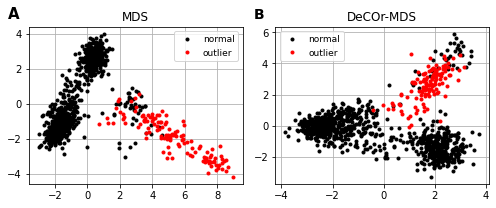

In [108]:
normal_indices=[i for i in range(num_point) if i not in outlier_indices] # list of normal points 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7,3))



# plot original graphs with outliers added 
va, ve, Xe = cMDS(out_dis_sq)
ax1.plot(Xe[normal_indices,0],Xe[normal_indices,1],'.', color='black', label="normal")
ax1.plot(Xe[outlier_indices,0],Xe[outlier_indices,1],'.',color='red', label="outlier")
ax1.legend(fontsize=9)
ax1.grid()
ax1.set_title("MDS")
ax1.text(-0.1, 1.05, 'A', transform=ax1.transAxes, 
        size=15, weight='bold')

# plot correct outliers 
va, ve, Xe = cMDS(corr_dis_sq)   
ax2.plot(Xe[normal_indices,0],-Xe[normal_indices,1],'.', color='black', label="normal")
ax2.plot(Xe[outlier_indices,0],-Xe[outlier_indices,1],'.',color='red', label="outlier")
ax2.legend(fontsize=9)
ax2.set_title("DeCOr-MDS")
ax2.text(-0.1, 1.05, 'B', transform=ax2.transAxes, 
        size=14, weight='bold')
ax2.grid()
plt.tight_layout()
fig_path =  f"../outputs/{dataset_id}_var_MDS_xy.pdf"
# plt.savefig(fig_path)
plt.show()
plt.close()

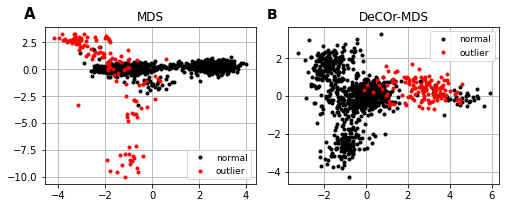

In [109]:


normal_indices=[i for i in range(num_point) if i not in outlier_indices] # list of normal points 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7,3))



# plot original graphs with outliers added 
va, ve, Xe = cMDS(out_dis_sq)
ax1.plot(Xe[normal_indices,1],Xe[normal_indices,2],'.', color='black', label="normal")
ax1.plot(Xe[outlier_indices,1],Xe[outlier_indices,2],'.',color='red', label="outlier")
ax1.legend(fontsize=9)
ax1.grid()
ax1.set_title("MDS")
ax1.text(-0.1, 1.05, 'A', transform=ax1.transAxes, 
        size=15, weight='bold')

# plot correct outliers 
va, ve, Xe = cMDS(corr_dis_sq)   
ax2.plot(-Xe[normal_indices,1],Xe[normal_indices,2],'.', color='black', label="normal")
ax2.plot(-Xe[outlier_indices,1],Xe[outlier_indices,2],'.',color='red', label="outlier")
ax2.legend(fontsize=9)
ax2.set_title("DeCOr-MDS")
ax2.text(-0.1, 1.05, 'B', transform=ax2.transAxes, 
        size=14, weight='bold')
ax2.grid()
plt.tight_layout()
fig_path =  f"../outputs/{dataset_id}_var_MDS_yz.pdf"
# plt.savefig(fig_path)
plt.show()
plt.close()

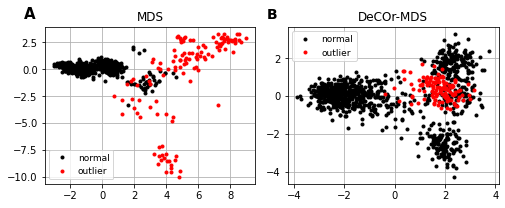

In [110]:
normal_indices=[i for i in range(num_point) if i not in outlier_indices] # list of normal points 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7,3))



# plot original graphs with outliers added 
va, ve, Xe = cMDS(out_dis_sq)
ax1.plot(Xe[normal_indices,0],Xe[normal_indices,2],'.', color='black', label="normal")
ax1.plot(Xe[outlier_indices,0],Xe[outlier_indices,2],'.',color='red', label="outlier")
ax1.legend(fontsize=9)
ax1.grid()
ax1.set_title("MDS")
ax1.text(-0.1, 1.05, 'A', transform=ax1.transAxes, 
        size=15, weight='bold')

# plot correct outliers 
va, ve, Xe = cMDS(corr_dis_sq)   
ax2.plot(Xe[normal_indices,0],Xe[normal_indices,2],'.', color='black', label="normal")
ax2.plot(Xe[outlier_indices,0],Xe[outlier_indices,2],'.',color='red', label="outlier")
ax2.legend(fontsize=9)
ax2.set_title("DeCOr-MDS")
ax2.text(-0.1, 1.05, 'B', transform=ax2.transAxes, 
        size=14, weight='bold')
ax2.grid()
plt.tight_layout()
fig_path =  f"../outputs/{dataset_id}_var_MDS_xz.pdf"
# plt.savefig(fig_path)
plt.show()
plt.close()

In [111]:
# 3D plot

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.io as pio


outlier_inds = np.zeros(df_gene_top500.shape[0])
outlier_inds[outlier_indices] = 1

fig = make_subplots(rows=1, cols=2, 
                    specs=[[{'type': 'scene'}, {'type': 'scene'}]],
                    subplot_titles=('MDS',  'DeCOr-MDS'))

va, ve, Xe_MDS = cMDS(out_dis_sq)

# fig.add_trace(
#     go.Scatter3d(x=Xe[normal_indices, 0], y=[normal_indices, 1], z=Xe[normal_indices, 2], mode='markers', \
#                  marker=dict(size=3, color='yellow')),
#         row=1, col=1)

camera = dict(
    up=dict(x=0, y=0, z=1),
    center=dict(x=0, y=0, z=0),
    eye=dict(x=1.25, y=1.25, z=1.25)
    # eye = dict(x=0., y=2.5, z=0)
)


fig.add_trace(
    go.Scatter3d(x=-Xe_MDS[normal_indices, 0], y=Xe_MDS[normal_indices, 1], z=Xe_MDS[normal_indices, 2], mode='markers', name = "normal", marker=dict(size=3, color='blue')),
    row=1, col=1
)
# fig.update_layout(scene_camera=camera)


fig.add_trace(
    go.Scatter3d(x=-Xe_MDS[outlier_indices, 0], y=Xe_MDS[outlier_indices, 1], z=Xe_MDS[outlier_indices, 2], mode='markers', name = "outlier", marker=dict(size=3, color='red')),
    row=1, col=1
)
# fig.update_layout(scene_camera=camera)


va, ve, Xe_De = cMDS(corr_dis_sq)   

fig.add_trace(
    go.Scatter3d(x=-Xe_De[normal_indices, 0], y=Xe_De[normal_indices, 1], z=Xe_De[normal_indices, 2], mode='markers', name = "normal", marker=dict(size=3, color='blue')),
    row=1, col=2
)
# fig.update_layout(scene_camera=camera)


fig.add_trace(
    go.Scatter3d(x=-Xe_De[outlier_indices, 0], y=Xe_De[outlier_indices, 1], z=Xe_De[outlier_indices, 2], mode='markers', name = "outlier", marker=dict(size=3, color='red')),
    row=1, col=2
)
fig.update_layout(scene_camera=camera)


# fig.update_layout(height=600, width=800, title_text="Side By Side Subplots")
fig.show()
fig_path = f"../outputs/{dataset_id}_var_MDS_3D.html"
fig.write_html(fig_path)

fig_path = f"../outputs/{dataset_id}_var_MDS_3D.pdf"
pio.write_image(fig, fig_path, width=1200, height=500)


In [112]:

""" 
Compute the average distance between the outlieres and the barycenter of regular points
"""

def centeroid(coords_list):
    """ 
    Computes the barycenter of a list of coordinates in coords_list
    """

    length = coords_list.shape[0]
    centroid = []
    for i in range(coords_list.shape[1]):
        centroid.append(np.sum(coords_list[:, i])/length)
    return np.array(centroid)

normal_centroid_MDS = centeroid(Xe_MDS[normal_indices, :]) # should only focus on the first inferred dimension coordinates
normal_centroid_MDS = normal_centroid_MDS[:subspace_dim]
outlier_Xe_MDS = Xe_MDS[outlier_indices, :subspace_dim]

    
# compute distance
total_distance = 0
for outlier_coord in outlier_Xe_MDS:
    total_distance += np.linalg.norm(outlier_coord-normal_centroid_MDS)
print("MDS average distance is:", total_distance/len(outlier_indices))

normal_centroid = centeroid(Xe_De[normal_indices, :]) # should only focus on the first inferred dimension coordinates
normal_centroid = normal_centroid[:subspace_dim]
outlier_Xe_De = Xe_De[outlier_indices, :subspace_dim]

# compute distance
total_distance = 0
for outlier_coord in outlier_Xe_De:
    total_distance += np.linalg.norm(outlier_coord-normal_centroid_MDS)
print("DeCOr-MDS average distance is:", total_distance/len(outlier_indices))


MDS average distance is: 7.489877758716874
DeCOr-MDS average distance is: 3.8532055137238252


In [113]:
# examine the gene expression count profile

def count_outlier_percent(all_counts, outlier_counts):
    def find_outlier_bound(all_counts):
        # Calculate the first and third quartiles (Q1 and Q3)
        q1 = np.percentile(all_counts, 25)
        q3 = np.percentile(all_counts, 75)

        # Calculate the interquartile range (IQR)
        iqr = q3 - q1

        # Define the lower and upper bounds for outliers
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        return lower_bound, upper_bound
    
    lower_bound, upper_bound = find_outlier_bound(all_counts)

    return sum((count > upper_bound or count < lower_bound) for count in outlier_counts)/len(outlier_counts)

In [114]:
# compute the drop off rate for all cells, and compute the drop off rate for outliers

def compute_drop_out(df, outlier_indices):
    """ 
    @param Dataframe df: The dataframe containing all cells 
    @param list[int] outlier_indices: The outlier indices 

    Returns the dropout rates and the outlier drop out rates 
    """
    drop_outs = []
    outlier_drop_outs = []

    num_index = 0
    for _, row in df.iterrows():
        zero_rate = sum(i == 0 for i in list(row))/float(df.shape[1])
        drop_outs.append(zero_rate)
        if num_index in outlier_indices:
            outlier_drop_outs.append(zero_rate)
        num_index += 1
    
    return drop_outs, outlier_drop_outs

In [115]:
drop_offs, outlier_drop_offs = compute_drop_out(df_gene_top500, outlier_indices)
print(outlier_drop_offs)

[0.694, 0.734, 0.718, 0.788, 0.748, 0.742, 0.81, 0.794, 0.782, 0.802, 0.746, 0.784, 0.766, 0.76, 0.852, 0.786, 0.838, 0.896, 0.748, 0.792, 0.766, 0.786, 0.792, 0.796, 0.902, 0.782, 0.78, 0.798, 0.81, 0.866, 0.882, 0.838, 0.802, 0.72, 0.766, 0.708, 0.708, 0.722, 0.718, 0.72, 0.676, 0.728, 0.79, 0.822, 0.724, 0.772, 0.752, 0.802, 0.716, 0.734, 0.782, 0.822, 0.784, 0.734, 0.812, 0.758, 0.73, 0.738, 0.822, 0.794, 0.856, 0.814, 0.808, 0.794, 0.792, 0.788, 0.796, 0.888, 0.872, 0.834, 0.878, 0.818, 0.886, 0.898, 0.896, 0.864, 0.846, 0.77, 0.702, 0.716, 0.866, 0.76, 0.766, 0.732, 0.792, 0.802, 0.722, 0.804, 0.708, 0.742, 0.752, 0.844, 0.758, 0.828, 0.792, 0.74, 0.778, 0.78, 0.784, 0.76, 0.776, 0.816, 0.728, 0.774, 0.868, 0.796, 0.792, 0.84, 0.784, 0.816, 0.87, 0.83, 0.836, 0.876, 0.78, 0.854, 0.86, 0.892, 0.804, 0.806, 0.872, 0.8, 0.878, 0.84, 0.842, 0.882]


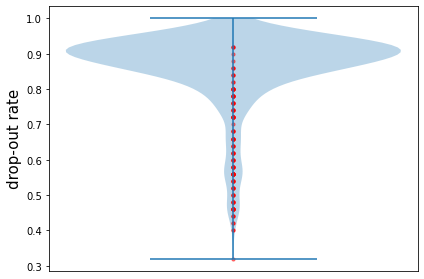

In [120]:
# compute the drop off rate for the top 50 highly variable genes
top50_genes = top_genes[:50]
df_gene_top50 = df_gene_top500.loc[:, top50_genes] 
# print(df_gene_top50.shape)

drop_offs, outlier_drop_offs = compute_drop_out(df_gene_top50, outlier_indices)

fig = plt.figure()
ax = plt.gca()
# fig.set_figheight(8)
# fig.set_figwidth(10)
label_size = 15
ax.violinplot(drop_offs)
ax.set_xticklabels([])

plt.scatter(x=[1]*len(outlier_drop_offs), y=outlier_drop_offs, s=10, alpha=0.5, c='red')
plt.ylabel("drop-out rate", fontsize=label_size)
plt.yticks(fontsize=10)
# plt.title('Dropout rates for the top 50 highly expressed genes')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.tight_layout()
fig_path = f"../outputs/{dataset_id}_var_dropout_violin_top50.pdf"
# plt.savefig(fig_path)
plt.show()


In [117]:
# perform pairwise T-test for all pairs between outliers and normal points
normal_indices=[i for i in range(num_point) if i not in outlier_indices]
outlier_df = df_gene_top500.iloc[outlier_indices]
normal_df = df_gene_top500.iloc[normal_indices]

outlier_total_counts = np.array(outlier_df).sum(axis=1)
normal_total_counts = np.array(normal_df).sum(axis=1)

pairs = []
for outlier_total_count in outlier_total_counts:
    for normal_total_count in normal_total_counts:
        pairs.append(normal_total_count-outlier_total_count)

num_pair = len(outlier_total_counts)*len(normal_total_counts)
degree = num_pair-1
 
est_mean = sum(pairs)/num_pair

# calculate standard deviation

est_sd = np.sqrt(sum([(pair-est_mean)**2 for pair in pairs])/degree)

# calculate the standard error of the mean
est_se = est_sd/np.sqrt(num_pair)

# calculate t-value
t_value = est_mean/est_se

print("degree of freedom:", degree, "t_value is:", t_value)

degree of freedom: 118061 t_value is: -926.6363519363205


In [101]:
# the t-value 105.81678660378093 is greater than the critical t value of degree 9569 (1.960-1.960), the null hypothesis is rejected.
# Significant level = 0.05
# The total counts from outlier group is significantly different from the total counts from the normal group.

In [102]:
# # Run nSimplices for the second time to see if additional outliers are detected

# feature_num = df_gene_top500.shape[1]
# df_gene_top500_second = df_gene_top500.iloc[normal_indices]
# dim_start = 3
# dim_end = 3
# out_dis = pdist(df_gene_top500_second)
# out_dis_sq = squareform(out_dis)
# num_point = df_gene_top500_second.shape[0]

# outlier_indices, subspace_dim, corr_dis_sq, corr_coord = nsimplices(out_dis_sq, feature_num, dim_start, dim_end, euc_coord=np.array(df_gene_top500.copy()), std_multi=6)
# print("the number of outliers in the second round is:", len(outlier_indices))